# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bidonsaha007/anaconda3/lib/python3.7/site-packages/tensorf

In [65]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Data

In [3]:
(x_train_all,y_train_all),(x_test,y_test)=cifar10.load_data()

# Constants

In [59]:
LOG_DIR='tensorboard_cifar_logs/'

LABEL_NAMES=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_PIXELS=IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS=3
TOTAL_INPUTS=IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE=10000
SMALL_TRAIN_SIZE=1000
NR_CLASSES=10

# Explore

In [5]:
type(x_train_all)

numpy.ndarray

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

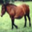

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
x_train_all.shape

(50000, 32, 32, 3)

In [10]:
y_train_all[7][0]

7

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

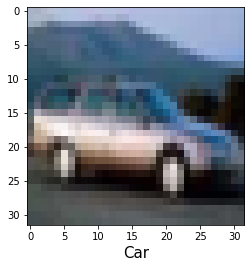

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

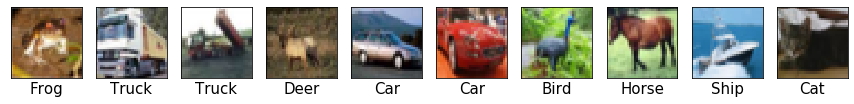

In [13]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]],fontsize=15)


In [14]:
x_train_all[0].shape

(32, 32, 3)

# Pre process

In [15]:
type(x_train_all[0][0][0][2])

numpy.uint8

In [16]:
x_train_all,x_test=x_train_all/255.0,x_test/255.0

In [17]:
x_train_all.shape

(50000, 32, 32, 3)

In [18]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)

In [19]:
x_train_all.shape

(50000, 3072)

In [20]:
x_test=x_test.reshape(len(x_test),TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


## Create validation

In [21]:
x_val=x_train_all[:VALIDATION_SIZE]
y_val=y_train_all[:VALIDATION_SIZE]
print(f'x_val.shape:{x_val.shape}  y_val.shape:{y_val.shape}')

x_val.shape:(10000, 3072)  y_val.shape:(10000, 1)


In [22]:
x_train=x_train_all[VALIDATION_SIZE:]
y_train=y_train_all[VALIDATION_SIZE:]
print(f'x_train.shape:{x_train.shape}  y_train.shape:{y_train.shape}')

x_train.shape:(40000, 3072)  y_train.shape:(40000, 1)


### create small dataset for illustration

In [23]:
x_train_xs=x_train[:SMALL_TRAIN_SIZE]
y_train_xs=y_train[:SMALL_TRAIN_SIZE]

 # Define NN in keras

In [24]:
model_1 = Sequential([
    Dense(units=128,input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
    Dense(units=64,activation='relu',name='m1_hidden2'),
    Dense(16,activation='relu',name='m1_hidden3'),
    Dense(10,activation='softmax',name='m1_output')
])

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
type(model_1)

keras.engine.sequential.Sequential

In [26]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [27]:
model_2=Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [28]:
model_3=Sequential()
model_3.add(Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128,activation='relu',name='m2_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(Dense(64,activation='relu',name='m2_hidden2'))
model_3.add(Dense(16,activation='relu',name='m2_hidden3'))
model_3.add(Dense(10,activation='softmax',name='m2_output'))

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
 (32*32*3*128+128) +(128*64+64) +(64*16+16)+(16*10+10)

402810

# Tensorboard (visualising learning)

In [31]:
def get_tensorboard(model_name):

    folder_name=f'{model_name} at {strftime("%H %M")}'
    dir_paths=os.path.join(LOG_DIR,folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)
    

# Fit Model

In [32]:
samples_per_batch=1000   #10

In [33]:
# %%time
# nr_epochs=150
# model_1.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch,epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')],verbose=0,validation_data=(x_val,y_val))

In [34]:
# %%time
# nr_epochs=150
# model_2.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch,epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')],verbose=0,validation_data=(x_val,y_val))

In [35]:
%%time
nr_epochs=100
model_1.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')],verbose=0,validation_data=(x_val,y_val))

Successfully created directory
CPU times: user 19min 8s, sys: 10.3 s, total: 19min 18s
Wall time: 3min 34s


In [36]:
%%time
nr_epochs=100
model_2.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')],verbose=0,validation_data=(x_val,y_val))

Successfully created directory
CPU times: user 26min 25s, sys: 11.2 s, total: 26min 36s
Wall time: 4min 20s


In [37]:
%%time
nr_epochs=100
model_3.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')],verbose=0,validation_data=(x_val,y_val))

Successfully created directory
CPU times: user 26min 35s, sys: 12.3 s, total: 26min 47s
Wall time: 4min 24s


# Prediction

In [38]:
x_val[0].shape

(3072,)

In [39]:
test=np.expand_dims(x_val[0],axis=0)
test.shape

(1, 3072)

In [40]:
np.set_printoptions(precision=3)

In [41]:
model_2.predict(test)

array([[0.055, 0.016, 0.06 , 0.236, 0.13 , 0.168, 0.241, 0.083, 0.001,
        0.01 ]], dtype=float32)

In [42]:
model_2.predict(x_val).shape

(10000, 10)

In [43]:
model_2.predict_classes(test)

array([6])

In [44]:
y_val[0]

array([6], dtype=uint8)

In [45]:
for i in range(10):
    test_img=np.expand_dims(x_val[i],axis=0)
    pred_class=model_2.predict_classes(test_img)[0]
    print(f'Predicted:{pred_class}  Actual:{y_val[i][0]}')

Predicted:6  Actual:6
Predicted:1  Actual:9
Predicted:9  Actual:9
Predicted:6  Actual:4
Predicted:9  Actual:1
Predicted:7  Actual:1
Predicted:6  Actual:2
Predicted:7  Actual:7
Predicted:0  Actual:8
Predicted:9  Actual:3


# Evaluation

In [47]:
model_2.metrics_names

['loss', 'accuracy']

In [49]:
test_loss,test_accuracy=model_2.evaluate(x_test,y_test)
print(f'Test loss {test_loss:0.3} and test accuracy {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 53us/step
Test loss 1.43 and test accuracy 49.2%


## Confusion matrix

In [52]:
predictions=model_2.predict_classes(x_test)
conf_matrix=confusion_matrix(y_true=y_test,y_pred=predictions)

In [53]:
conf_matrix.shape

(10, 10)

In [54]:
nr_rows=conf_matrix.shape[0]
nr_cols=conf_matrix.shape[1]

In [55]:
conf_matrix.max()

645

In [56]:
conf_matrix.min()

6

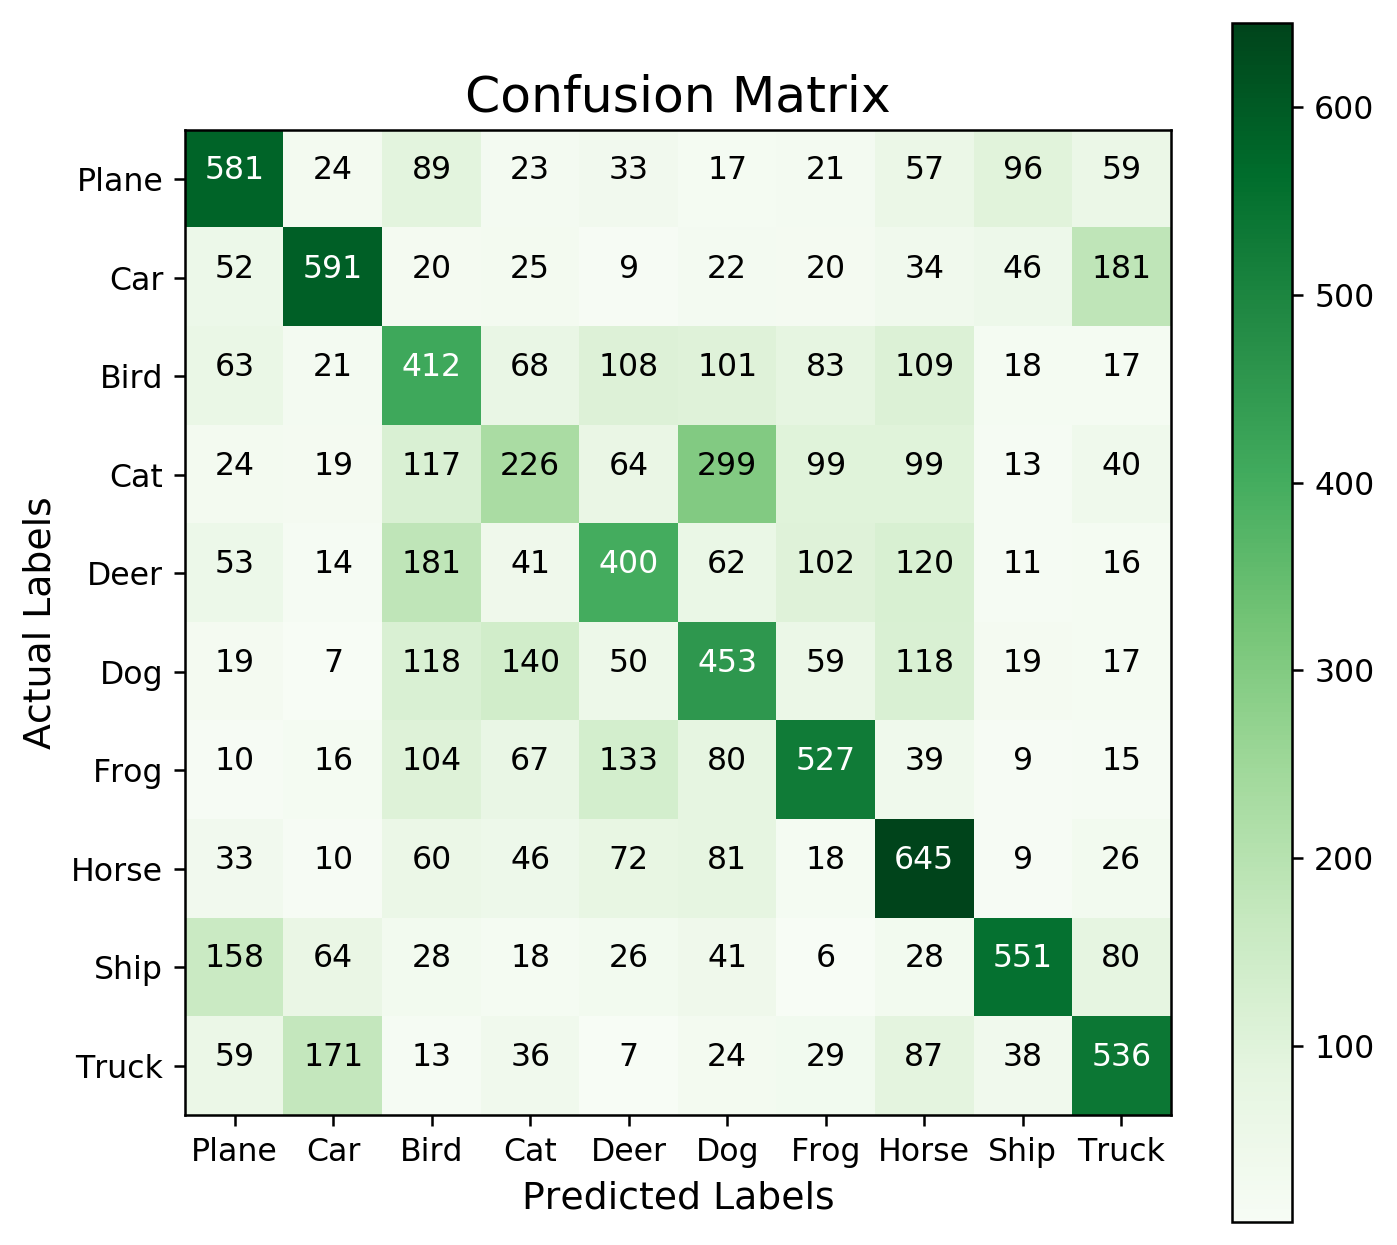

In [71]:
plt.figure(figsize=(7,7),dpi=227)
plt.imshow(conf_matrix,cmap=plt.cm.Greens)
plt.title('Confusion Matrix',fontsize=16)
plt.ylabel('Actual Labels',fontsize=12)
plt.xlabel('Predicted Labels',fontsize=12)

tick_marks=np.arange(NR_CLASSES)
plt.yticks(tick_marks,LABEL_NAMES)
plt.xticks(tick_marks,LABEL_NAMES)
plt.colorbar()

for i,j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(j,i,conf_matrix[i,j],horizontalalignment='center',
            color='white' if conf_matrix[i,j]>conf_matrix.max()/2 else 'black')

plt.show()

In [72]:
recall =np.diag(conf_matrix)/np.sum(conf_matrix,axis=1)
recall

array([0.581, 0.591, 0.412, 0.226, 0.4  , 0.453, 0.527, 0.645, 0.551,
       0.536])

In [73]:
precision=np.diag(conf_matrix)/np.sum(conf_matrix,axis=0)
precision

array([0.552, 0.631, 0.361, 0.328, 0.443, 0.384, 0.547, 0.483, 0.68 ,
       0.543])

In [74]:
avg_recall=np.mean(recall)
print(f'{avg_recall:0.2%}')

avg_precision=np.mean(precision)
print(f'{avg_precision:0.2%}')

49.22%
49.51%


In [77]:
f_score=2*(avg_precision*avg_recall)/(avg_precision+avg_recall)
print(f'{f_score:.2%}')

49.37%
